In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2 as cv

In [4]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [5]:
df_cat = pd.read_csv(f'{combine_fold}/cosmos2020-categorised-interactions.csv', index_col = 0)

In [6]:
df_cat

,ORyan23_ID,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage3,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,861738,stage1,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,1.332813e-05,...,-9.574272,-9.548649,-9.503962,-9.439343,-9.384205,0.240042,0.281559,0.330791,0.384371,0.436491
2,4000705539529,1284864,stage1,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,1.244353e-06,...,-9.669377,-9.614943,-9.570104,-9.533121,-9.476167,0.094187,0.114436,0.140990,0.159430,0.183608
3,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
4,4000705540034,1304538,stage1,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,6000535066150,1157587,stage4,150.422510,2.514655,15373.875977,29370.304688,0.000024,0.000027,8.697323e-06,...,-13.220035,-13.215519,-10.469687,-9.954029,-9.691111,0.173505,0.240862,0.328586,0.439079,0.546386
3792,6000535121452,1035987,stage1,149.694761,2.397231,32824.328125,26552.759766,0.000012,0.000015,-7.174042e-07,...,-10.287872,-10.060802,-9.853634,-9.456022,-9.315375,0.343488,0.463897,0.646257,1.016819,1.285051
3793,6000535865556,1138628,stage1,150.490889,2.496660,13734.171875,28938.828125,0.001929,0.001333,1.953999e-04,...,-9.875473,-9.817194,-9.580817,-9.265499,-9.099182,0.026873,0.026873,0.164250,0.549086,0.751945
3794,6000536013605,1203157,stage1,150.202813,2.558504,20641.730469,30421.910156,0.000051,0.000067,4.840965e-07,...,-9.804204,-9.683063,-9.470870,-9.189605,-8.982660,0.539500,0.595082,0.778112,1.062422,1.232495


In [31]:
df_red_tmp = df_cat.query('ez_sfr < 10')
df_red = df_red_tmp.query('lp_mass_best > 6.5')

In [33]:
def create_plot_ez(df, ax, stage, control):
    
#     ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
#     ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
#     scatter_hist(np.array(list(df.mass_best_1)), np.array(list(df.sfr_best_1)), ax, ax_histx, ax_histy, 'black')
    
    df.plot.scatter(
        x = 'lp_mass_best',
        y = 'ez_sfr',
        ax = ax,
        xlim = [5.5,12.5],
        ylim = [-6,3.0],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

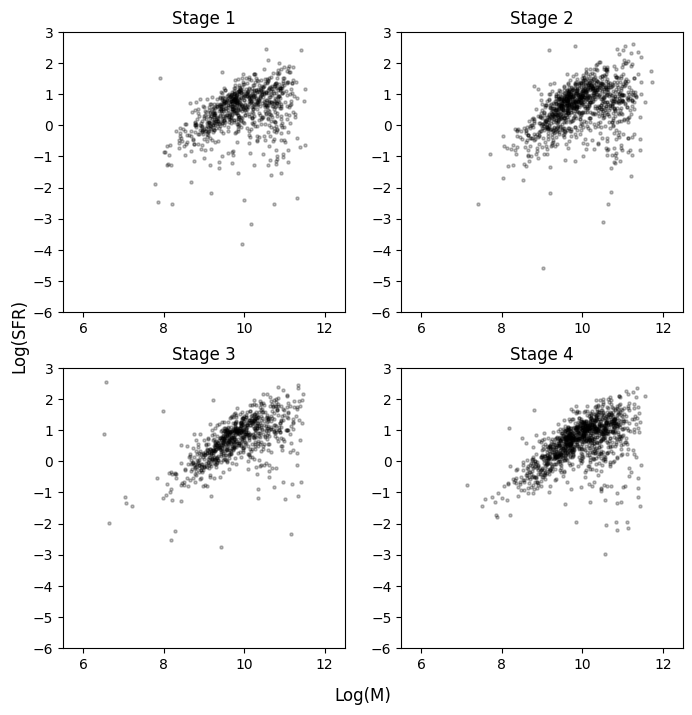

In [34]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_ez(df_red.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

In [72]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, colour):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 0.5, color=colour, alpha = 0.25)
    #threshold = 0.065
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.1, levels=8, color='orange')
    ax.set_xlim([6.5,12.5])
    ax.set_ylim([-5, 3.5])

    # now determine nice limits by hand:
    binwidth = 0.15
    xymax = max(12.5, 3.5)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, histtype = 'step', color = colour)
    ax_histy.hist(y, bins=bins, orientation='horizontal', histtype='step', color=colour)

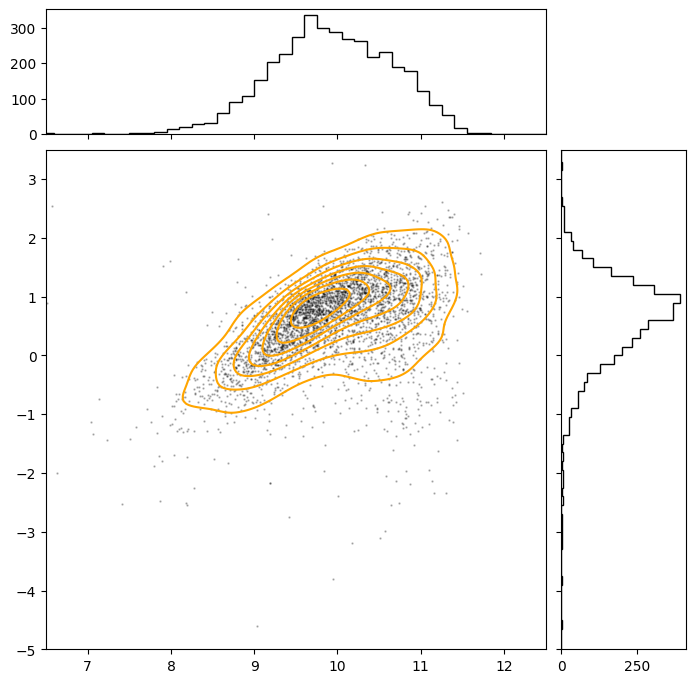

In [ ]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_red.lp_mass_best)), np.array(list(df_red.ez_sfr)), ax, ax_histx, ax_histy, 'black')

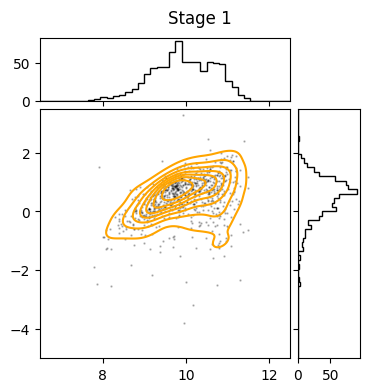

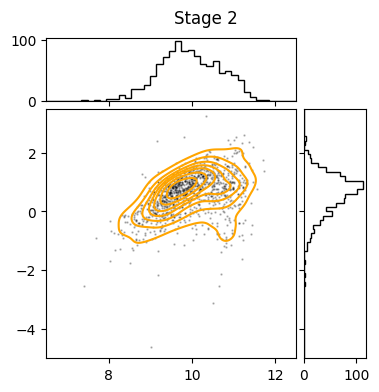

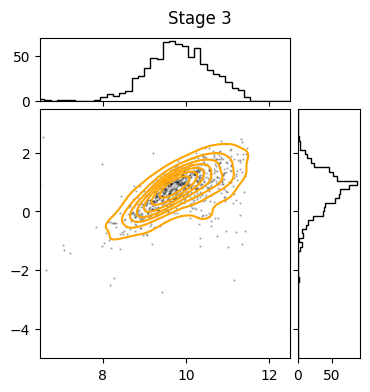

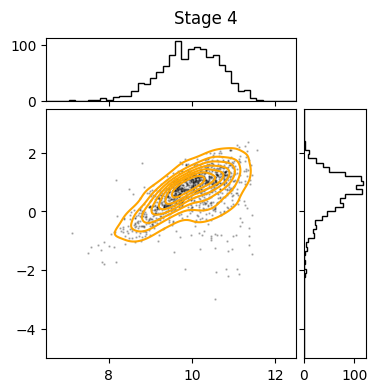

In [74]:
# colours = ['black','blue','red','orange']

for i in range(0,4):
    
    fig = plt.figure(figsize = (4,4))
    gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1,0])
    ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
    ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
    df_stage = df_red.query(f'category == "stage{i+1}"')

    scatter_hist(np.array(list(df_stage.lp_mass_best)), np.array(list(df_stage.ez_sfr)), ax, ax_histx, ax_histy, 'black')
    
    fig.text(0.5, 0.95, f'Stage {i + 1}', ha='center', va='center', fontsize = 12)
    
    plt.savefig(f'{fig_folder}/stage{i+1}.jpeg', bbox_inches = 'tight', dpi = 100)
    
    plt.show()

### Testing with Image Trick

In [75]:
fig_folder

'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [76]:
im_files = glob.glob(f'{fig_folder}/sfr-stages/*.jpeg')

In [77]:
im_files

['C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures/sfr-stages\\stage1.jpeg',
 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures/sfr-stages\\stage2.jpeg',
 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures/sfr-stages\\stage3.jpeg',
 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures/sfr-stages\\stage4.jpeg']

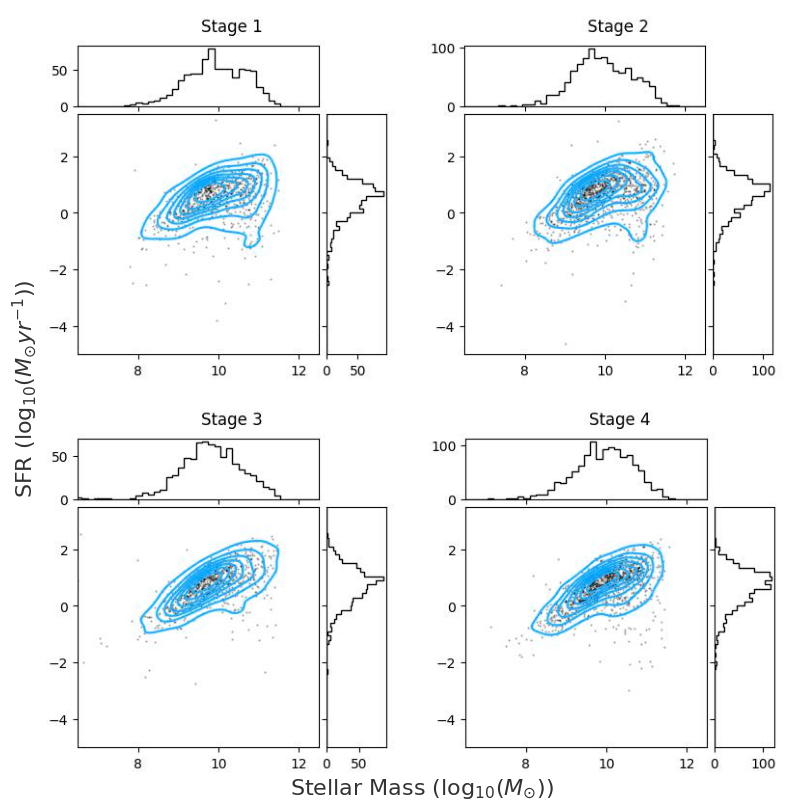

In [106]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
counter = 0
for i in range(2):
    for j in range(2):
        im = cv.imread(im_files[counter])
        ax[i,j].imshow(im)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axis('off')
        counter += 1
fig.text(0,0.38, 'SFR ($\log_{10}(M_{\odot}yr^{-1}$))', fontsize = 16, rotation = 90, alpha = 0.80)
fig.text(0.35,0, 'Stellar Mass ($\log_{10}(M_{\odot})$)', fontsize = 16, alpha = 0.80)
fig.tight_layout()
fig.savefig(f'{fig_folder}/sfr-mass-stages.pdf', bbox_inches = 'tight')
plt.show()

### Mass Distribution of Stages
Here, and in the next section, I want to build some normalised histograms of the masses and sfrs of the different stages.

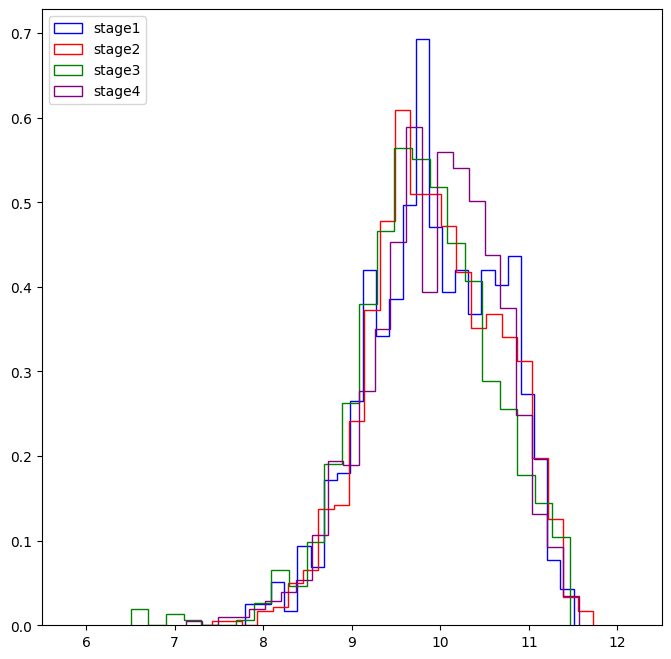

In [127]:
plt.figure(figsize = (8,8))
plt.hist(df_red.query('category == "stage1"')['lp_mass_best'], bins = 25, histtype='step', color='blue', density = True)
plt.hist(df_red.query('category == "stage2"')['lp_mass_best'], bins = 25, histtype='step', color='red', density = True)
plt.hist(df_red.query('category == "stage3"')['lp_mass_best'], bins = 25, histtype='step', color='green', density = True)
plt.hist(df_red.query('category == "stage4"')['lp_mass_best'], bins = 25, histtype='step', color='purple', density = True)
plt.legend(['stage1','stage2','stage3','stage4'])
plt.xlim([5.5,12.5])
plt.show()

### Star Formation Between Stages

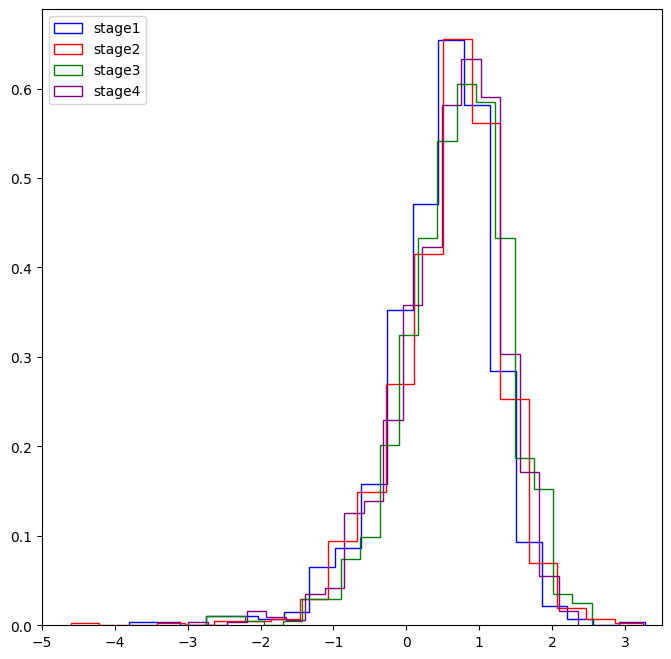

In [128]:
plt.figure(figsize = (8,8))
plt.hist(df_red.query('category == "stage1"')['ez_sfr'], bins = 20, histtype='step', color='blue', density = True)
plt.hist(df_red.query('category == "stage2"')['ez_sfr'], bins = 20, histtype='step', color='red', density = True)
plt.hist(df_red.query('category == "stage3"')['ez_sfr'], bins = 20, histtype='step', color='green', density = True)
plt.hist(df_red.query('category == "stage4"')['ez_sfr'], bins = 20, histtype='step', color='purple', density = True)
plt.legend(['stage1','stage2','stage3','stage4'])
plt.xlim([-5,3.5])
plt.show()